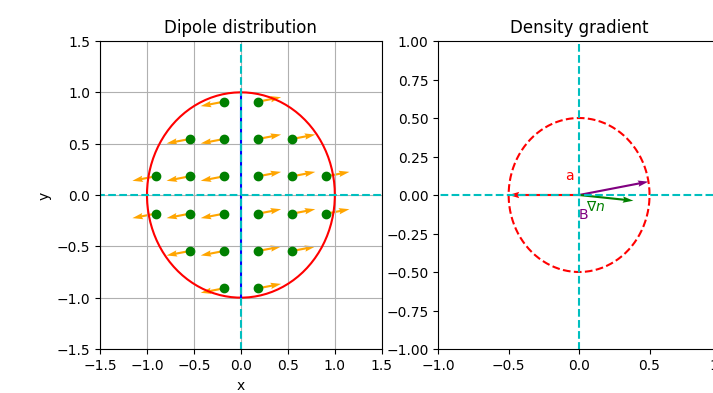

In [3]:
import import_ipynb
import Scheme_circle as el_XY
import Scheme_ellipse as el_XZ
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
# from ipywidgets import interact
from IPython.display import display, clear_output, Markdown, HTML

# Dropdown menu
dropdown = widgets.Dropdown(
    options={"X-Y plane": "XY", "X-Z plane": "XZ"},
    description='Choose view:'
)
display(HTML(r"""
<p>
Here is a diagram showing how acceleration affects the density distribution
for a prolate/oblate ellipsoid of the form:
</p>

<p style="text-align:center; font-size: 1.1em;">
x² + y² + k²z² = C
</p>
"""))


k_slider=widgets.FloatSlider(min=0.35, max=3, step=0.05, value=1, description="k")
edd_slider=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.4, description="εdd")
phi_slider=widgets.IntSlider(min=0, max=90, step=1,value=10, description="φ")
theta_slider=widgets.IntSlider(min=0, max=90, step=1,value=0, description="θ")

plot_output = widgets.Output()
text_output = widgets.Output()
controls_box = widgets.VBox()

# Updates plot function
def update_plot():
        with plot_output:
            clear_output(wait=True)  # Clear previous plot
            if dropdown.value == 'XY':
               el_XY.plot_ellipse_XY(k_slider.value, edd_slider.value, phi_slider.value, theta_slider.value)
            elif dropdown.value == 'XZ':
               el_XZ.plot_ellipse_XZ(k_slider.value, edd_slider.value, phi_slider.value, theta_slider.value)

def update_text():
    shared_text=r"""
<p><strong>Left side:</strong> display plane view of dipole distribution inside the ellipsoid.</p>

<p><strong>Right side:</strong> display how the density gradient induced by acceleration is deformed due to dipolar interaction.</p>

<p>
Angle θ regulates the direction of the acceleration
(<span style="color:red;">red</span> vector), while φ
regulates the direction of the magnetic field
(<span style="color:purple;">purple</span> vector).
</p>

<p>
The <span style="color:green;">green</span> vector shows the total direction
of the density gradient. Due to dipolar interaction, it can change both in
direction and in amplitude. If the dipolar interaction is absent, the density
gradient is simply opposite to the acceleration.
</p>

<p>
The <span style="color:cyan;">cyan dashed</span> line depicts the axis of zero
deflection: if the magnetic field is directed along this axis, the density
gradient is only scaled and not deflected. Such lines do not depend on
ε<sub>dd</sub>. And dahed green line depicts all variations of density gradient, 
assuming acceleration is fixed, and magnetic field is variated in all possible directions.
</p>
"""

    # md_text = ""
    if dropdown.value == "XY":
        md_text = r"""
<hr>
<p><strong>XY-view</strong></p>
"""
    elif dropdown.value == "XZ":
        md_text = r"""
<hr>
<p><strong>XZ-view</strong>   (the total volume is assumed to be fixed)</p>
"""
    full_text=md_text+shared_text
    with text_output:
        clear_output(wait=True)
        display(HTML(full_text))
        
def update_controls(change=None):
    if dropdown.value == "XY":
        controls_box.children = [k_slider, edd_slider, phi_slider, theta_slider]
    elif dropdown.value == "XZ":
        controls_box.children = [k_slider, edd_slider, phi_slider, theta_slider]
    update_plot()
    update_text()

dropdown.observe(update_controls, names="value")
for slider in [k_slider, edd_slider, phi_slider, theta_slider]:
    slider.observe(lambda change: [update_plot(), update_text()], names="value")

update_controls()  # set up initial controls
display(widgets.VBox([dropdown, controls_box, plot_output, text_output]))
